In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys  

#extraction and npl
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import RFE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedShuffleSplit

from sklearn.cluster import KMeans

from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


#forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#bagging
from sklearn.ensemble import BaggingClassifier
#forests
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import make_classification

#Knn
from sklearn.neighbors import KNeighborsClassifier



from sklearn.preprocessing import LabelEncoder


from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn import datasets

import string

from sklearn.decomposition import PCA

from sklearn.naive_bayes import MultinomialNB

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

#  I scraped data in another workbook 
I scraped Indeed.com 
The search terms are my degrees. I only search my geographical region

In [2]:
pwd


u'/Users/marthataylor/GA/Capstone'

In [3]:
#importing the CSV file from job description misc
listingFile =pd.read_csv("jobListingSummary.csv")
                         #,encoding='utf-8')

In [4]:
listingFile.shape

(45, 5)

In [5]:
listingFile.columns=[['Degree','Job Title', 'City Location', 'Description', 'Source']]

In [6]:
listingFile.head(1)

,Degree,Job Title,City Location,Description,Source
0,software+development,Software Intern,"Dayton, OH",Demonstrated ability to work as part of a team...,sent descriptions


In [7]:
listingFile['Degree'].value_counts()

user+support            19
software+development    15
network+manager          4
data+analysis            3
dayton+science           1
web+developer            1
web+development          1
dayton+analysis          1
Name: Degree, dtype: int64

# Data Cleaning

In [8]:
#now make all words in description lower case
listingFile['CleanDescription']=listingFile['Description'].apply(lambda x: x.lower())

In [9]:
#removing numbers
listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))

In [10]:
#remove punctuation - code could be more efficient
listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.strip(','))
listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.strip('.'))
#listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.replace('\('))



In [11]:
#removing numbers from the descriptions
listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.lstrip().replace('\n',''))

In [12]:
#checking to see if any null characters
listingFile.isnull().sum()

Degree              0
Job Title           0
City Location       0
Description         0
Source              0
CleanDescription    0
dtype: int64

In [13]:
#drop duplicates
print listingFile.shape
listingFile=listingFile.drop_duplicates()
print listingFile.shape

(45, 6)
(45, 6)


In [14]:
# Removing certain words to see if this will improve my clustering. It did not.

In [15]:
#listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.replace('development',''))

In [16]:
listingFile['CleanDescription'].head(30)

0     demonstrated ability to work as part of a team...
1     visual studio experience, ver.  and/or .  .net...
2     currently enrolled in a bachelor�s or master�s...
3     in the position of software development co-op,...
4     in the position of information technology (it)...
5     knowledge of tcp/ip networking and the osi mod...
6     takes, prioritizes and documents help desk cal...
7     object oriented programming-knowledge of asp.n...
8     - years� experience   proven track record of p...
9     responds to requests for technical assistance ...
10    achieving or working towards associate or bach...
11    this is an entry level intern position requiri...
12    customer oriented attitude, ability to communi...
13    basic computer networking skills. + years expe...
14    in the process of obtaining an it-related degr...
15    typically requires a minimum one year of deskt...
16    visual studio  automated testing unit/integrat...
17    excellent verbal and written communication

In [17]:
listingFile['CleanDescription']= listingFile['CleanDescription'].apply(lambda x: x.strip('?'))

# Label encoder for degrees

In [18]:
label_encoder = preprocessing.LabelEncoder()
# input_classes = ['user+support', 'software+development', 'web+development', 'network+manager',
#         'network+engineer', 'cyber+security','data+science', 'data+analysis']
label_encoder.fit(listingFile['Degree'])


LabelEncoder()

In [21]:
encoded_labels = label_encoder.transform(listingFile['Degree'])
# print "\nLabels =", input_classes 
# print "Encoded labels =", list(encoded_labels)

In [22]:
#creating a column for encoded degree
listingFile['encodedDegree']=label_encoder.transform(listingFile['Degree'])

# count vectorizer of the cleanDescription

In [23]:
# will not limit the number of words
cvec = CountVectorizer()
v = CountVectorizer(
    binary=True,  
    stop_words='english')
#,max_features=500


In [26]:
listingFile['CleanDescription'] = listingFile['CleanDescription'].apply(lambda x: x.decode(errors='ignore'))

wordsDescription = v.fit_transform(listingFile['CleanDescription']).todense()
wordsDescription = pd.DataFrame(wordsDescription, columns=v.get_feature_names())
wordsDescription.shape

(45, 877)

In [27]:
wordsDescription.head(1)

,abilities,ability,able,abreast,academic,access,accommodate,accordance,accordingly,accurate,...,workstations,write,writing,written,xml,xslt,yarn,year,years,youre
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# create dummies from the degree to see if words can predict degree

In [28]:
degreeDummies=pd.get_dummies(listingFile['Degree'])
wordDescDegree=pd.DataFrame(wordsDescription).join(pd.DataFrame(degreeDummies))
wordDescDegree.head(1)

,abilities,ability,able,abreast,academic,access,accommodate,accordance,accordingly,accurate,...,years,youre,data+analysis,dayton+analysis,dayton+science,network+manager,software+development,user+support,web+developer,web+development
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
allDegreeData=pd.DataFrame(listingFile['encodedDegree']).join(pd.DataFrame(listingFile['Degree'])).join(pd.DataFrame(degreeDummies))

In [30]:
allDegreeData.head(1)

,encodedDegree,Degree,data+analysis,dayton+analysis,dayton+science,network+manager,software+development,user+support,web+developer,web+development
0,4,software+development,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# creating dimension reduction PCA on x

In [ ]:
# I tried a series of components  decided on 5

In [35]:
pca=PCA(n_components=5)
pca.fit(x)
pca.fit_transform(x)

array([[ -6.39734070e-01,   4.41654851e-01,  -7.54406491e-01,
          8.85407683e-01,  -7.66922040e-01],
       [ -1.37788041e+00,   2.96544875e-01,   2.20719021e-01,
          6.62640067e-01,  -7.87230137e-01],
       [  5.02554082e-01,  -1.96335130e-01,   7.55834228e-02,
         -6.07522501e-02,  -6.17131801e-01],
       [  5.40315692e-01,   8.31968974e-01,  -5.09564661e-01,
          4.76309087e+00,   3.46445714e+00],
       [ -7.91884520e-01,  -9.73253278e-01,   2.34613146e-01,
         -7.85213423e-02,   1.56315992e+00],
       [ -5.62429411e-01,   3.53102780e-01,   2.43877928e-01,
         -4.58572424e-01,  -9.49117274e-01],
       [ -1.84993998e+00,  -1.00804753e-01,   1.08331619e+00,
          5.09963393e-01,  -1.11059329e-01],
       [ -9.23685458e-01,   6.33868716e-01,  -1.10005059e-01,
          8.99733315e-01,  -5.92775344e-01],
       [ -1.33419462e-01,   9.44833798e-01,  -8.99847389e-01,
          1.54003610e+00,  -2.98739524e-01],
       [ -1.82255985e+00,  -2.5903151

In [36]:
pca.get_covariance()

array([[ 0.70044347,  0.02507698,  0.00113402, ..., -0.0012957 ,
        -0.00958799, -0.0008477 ],
       [ 0.02507698,  0.77460683,  0.00143049, ..., -0.00879434,
         0.05697125, -0.00627436],
       [ 0.00113402,  0.00143049,  0.67184877, ..., -0.00137422,
        -0.00154106, -0.00127815],
       ..., 
       [-0.0012957 , -0.00879434, -0.00137422, ...,  0.67410177,
        -0.00269848,  0.00426584],
       [-0.00958799,  0.05697125, -0.00154106, ..., -0.00269848,
         0.73204574, -0.00084339],
       [-0.0008477 , -0.00627436, -0.00127815, ...,  0.00426584,
        -0.00084339,  0.67621584]])

In [37]:
pca.explained_variance_

array([ 3.73213026,  2.74215105,  2.39620935,  2.19587997,  1.9733959 ])

In [38]:
np.cumsum(pca.explained_variance_)

array([  3.73213026,   6.47428132,   8.87049066,  11.06637063,  13.03976653])

In [39]:
train_features=pca.fit_transform(x)

In [40]:
train_features.shape

(45, 5)

# lets try random forest with full dataset and pca

1. using full data set without train test.  I am only doing this to get a list of words for each degree
2. using PCA  I did this to see if this predicts my degrees

In [41]:
#full dataset 
y=LabelEncoder().fit_transform(listingFile['Degree'])
cv = StratifiedKFold(y, n_folds=4, shuffle=True, random_state=41)
print type(y), y[0:6]
print type(x)

<type 'numpy.ndarray'> [4 4 4 4 5 3]
<class 'pandas.core.frame.DataFrame'>


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=4.
  % (min_labels, self.n_folds)), Warning)


In [42]:
x.shape, y.shape


((45, 877), (45,))

In [43]:
rf=RandomForestClassifier(class_weight ='balanced', n_jobs=-1)
s=cross_val_score(rf,x.values,y,cv=cv, n_jobs=-1)


In [44]:
s

array([ 0.83333333,  0.75      ,  0.63636364,  0.6       ])

In [45]:
rf.fit(x, y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [46]:
#nice score of course it includes all data!
rf.score(x, y)

0.97777777777777775

In [ ]:
# for f in range(x.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

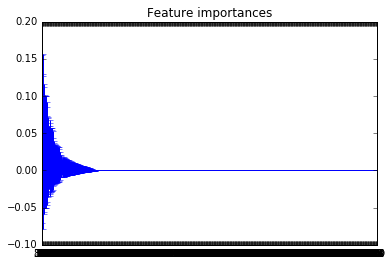

In [47]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

In [48]:
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [49]:
#this is what I want to see
feature_importancesRF.head(20)

,importance
including,0.042175
technology,0.041648
external,0.041523
apache,0.039171
grow,0.029155
bachelors,0.027884
big,0.027645
websphere,0.025451
enhance,0.025065
maintains,0.024956


In [50]:
predictionsRF=rf.predict(x)

In [51]:
print confusion_matrix(y, predictionsRF)

[[ 3  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0 19  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1]]


In [52]:
#this chart is very meaningfull miss-predictions show overlap of degrees
conmat = np.array(confusion_matrix(y, predictionsRF))
confusion = pd.DataFrame(conmat, index=['USSU', 'SODE', 
                         'WEDE', 'NEMA','NEED', 'CYIT'],columns=['Pred USSU', 'Pred SODE', 
                         'Pred WEDE', 'Pred NEMA','Pred NEED', 'Pred CYIT'])
print confusion


ValueError: Shape of passed values is (8, 8), indices imply (6, 6)

In [ ]:
print  classification_report(y, predictionsRF)

# random forest by degree - want feature importance
this will help me understand the job market

In [ ]:
wordDescDegree.columns

In [ ]:
yCYIT=wordDescDegree['cyber+security']
yNEEN=wordDescDegree['network+engineer']
yNEMA=wordDescDegree['network+manager']
ySODE=wordDescDegree['software+development']
yUSSU=wordDescDegree['user+support']
yWEDE=wordDescDegree['web+development']

In [ ]:
yDegree=yCYIT
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(20)

In [ ]:
yDegree=yNEEN
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(30)

In [ ]:
yDegree=yNEMA
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(30)

In [ ]:
yDegree=ySODE
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(30)

In [ ]:
yDegree=yUSSU
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(20)

In [ ]:
yDegree=yWEDE
rf.fit(x, yDegree)
rf.score(x, yDegree)
importances = rf.feature_importances_
feature_importancesRF = pd.DataFrame(rf.feature_importances_,
                                   index = x.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print rf.score(x, yDegree)
print feature_importancesRF.head(20)

# Random Forest on  train test

In [ ]:
train_features=pca.fit_transform(x_train)

In [ ]:
x_train.shape, train_features.shape,y_train.shape


In [ ]:
rfTTS=RandomForestClassifier(class_weight ='balanced', n_jobs=-1)


In [ ]:
listingFile.ix[2634]

In [ ]:
cv = StratifiedKFold(y_train, n_folds=4, shuffle=True, random_state=41)
# print type(y), y[0:6]
# print type(x)

In [ ]:
sTTS=cross_val_score(rfTTS,train_features,y_train,cv=cv, n_jobs=-1)

In [ ]:
# s

In [ ]:
rfTTS.fit(train_features, y_train)
importances = rfTTS.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [ ]:
rfTTS.score(train_features, y_train)

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()

# RF model built with PCA test data

In [ ]:
train_features.shape, x_test.shape


In [ ]:
test_features=pca.transform(x_test)

In [ ]:
rfTTS.score(test_features, y_test)

In [ ]:
predictionsRF_test=rfTTS.predict(test_features)

In [ ]:
y_test.shape, predictionsRF_test.shape

In [ ]:
print confusion_matrix(y_test, predictionsRF_test)

In [ ]:
#this matrix is very telling
conmat = np.array(confusion_matrix(y_test, predictionsRF_test))
confusion = pd.DataFrame(conmat, index=['USSU', 'SODE', 
                         'WEDE', 'NEMA','NEED', 'CYIT'],columns=['Pred USSU', 'Pred SODE', 
                         'Pred WEDE', 'Pred NEMA','Pred NEED', 'Pred CYIT'])
print confusion

In [ ]:
print  classification_report(y_test, predictionsRF_test)

# K nearest neighbors entire dataset - first


In [ ]:
x=wordsDescription

In [ ]:
y=listingFile['encodedDegree']
y.column='degree'

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
#5 closest neighbors

In [ ]:
knn.fit(x,y)

In [ ]:
knn.score(x,y)

In [ ]:
scores=cross_val_score(knn,x.values,y,cv=5,scoring = 'accuracy')

In [ ]:
predictionsKNN=knn.predict(x)

In [ ]:
print confusion_matrix(y, predictionsKNN)
# conmat = np.array(confusion_matrix(y, predictionsKNN))
# confusion = pd.DataFrame(conmat, index=['USSU', 'SODE', 
#                          'WEDE', 'NEMA','NEED', 'CYIT'],columns=['Pred USSU', 'Pred SODE', 
#                          'Pred WEDE', 'Pred NEMA','Pred NEED', 'Pred CYIT'])
# print confusion

In [ ]:
conmat = np.array(confusion_matrix(y, predictionsKNN))
confusion = pd.DataFrame(conmat, index=['USSU', 'SODE', 
                         'WEDE', 'NEMA','NEED', 'CYIT'],columns=['Pred USSU', 'Pred SODE', 
                         'Pred WEDE', 'Pred NEMA','Pred NEED', 'Pred CYIT'])
print confusion

In [ ]:
print  classification_report(y, predictionsKNN)

# Knn on PCA training set 

In [ ]:
knnTTS=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knnTTS.fit(train_features,y_train)

In [ ]:
knnTTS.score(train_features,y_train)

In [ ]:
predictionsKNN=knnTTS.predict(train_features)

In [ ]:
print confusion_matrix(y_train, predictionsKNN)

# Knn on test data after being trained on training data

In [ ]:
test_featuresKNN_TTS=pca.transform(x_test)

In [ ]:
knnTTS.score(test_featuresKNN_TTS,y_test)

In [ ]:
predictionsKNN_TTS=knnTTS.predict(test_featuresKNN_TTS)

In [ ]:
print confusion_matrix(y_test, predictionsKNN_TTS)

In [ ]:
conmat = np.array(confusion_matrix(y_test, predictionsKNN_TTS))
confusion = pd.DataFrame(conmat, index=['USSU', 'SODE', 
                         'WEDE', 'NEMA','NEED', 'CYIT'],columns=['Pred USSU', 'Pred SODE', 
                         'Pred WEDE', 'Pred NEMA','Pred NEED', 'Pred CYIT'])
print confusion

In [ ]:
print  classification_report(y_test, predictionsKNN_TTS)

# Naive Bayes for clustering not going to use

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(x,y)

In [ ]:
mnb.score(x,y)

In [ ]:
y_hat=mnb.predict(x)

In [ ]:
print classification_report(y, y_hat)

In [ ]:
confusion_matrix(y,y_hat)

In [ ]:
predicted_probabilities=mnb.predict_proba(x)
predicted_probabilities[0:5]

# K means

In [ ]:
#standarizing x  Richard made me do this. I liked my results from the non-transformed data
#but he said for KMeans the data needs to be transformed
#everything clustered together in to one cluster
# I think when I enter data from job description I will be able to use this
standardizedFeatures=StandardScaler().fit_transform(wordsDescription)

In [ ]:
kmeans=KMeans(6)
kmeans.fit(standardizedFeatures)
predicts=kmeans.predict(standardizedFeatures)

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(standardizedFeatures)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
df = pd.DataFrame(standardizedFeatures, columns=wordsDescription.columns)

# df.development.describe()
# df.head()

In [ ]:
wordsDescription.sum().sort_values().plot(kind='hist')

In [ ]:

type(listingFile)

In [ ]:
df.shape

In [ ]:
df = listingFile.join(pd.DataFrame(kmeans.predict(standardizedFeatures), 
                 columns=['with standardized wordsDescription']))

In [ ]:
df.tail()

In [ ]:
# resultsOFClustering=df[['Degree','Search Criteria','encodedDegree','predictions_k6']]

In [ ]:
#resultsOFClustering.head(1)

In [ ]:
# for n_clusters in range(0,6):
#     fig, (ax1, ax2)=plt.subplots(1,2)
#     fig.set_size_inches(18,7)

In [ ]:
clusterer = AgglomerativeClustering(n_clusters=2)
cluster_labels = clusterer.fit_predict(standardizedFeatures)

In [ ]:
#new_df = listingFile.join(pd.DataFrame(cluster_labels, columns=['labels']))
#new_df.loc[(new_df['labels'] == 1), 'CleanDescription'].values # to see the actual description
#new_df.loc[(new_df['labels'] == 1)]

In [ ]:
#new_df.tail()

In [ ]:
# from sklearn.cluster import AgglomerativeClustering

range_n_clusters = range(2, 5)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(standardizedFeatures) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(standardizedFeatures)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(standardizedFeatures, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(standardizedFeatures, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# without scaler so the following code is worthless - too bad
because I like the results


In [ ]:
kmeans=KMeans(6)
kmeans.fit(x)
predicts=kmeans.predict(x)

In [ ]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
df = listingFile.join(
    pd.DataFrame(kmeans.predict(x), 
                 columns=['predictions_k6'])
)

In [ ]:
df.head()

In [ ]:
resultsOFClustering=df[['Degree','Search Criteria','encodedDegree','predictions_k6']]

In [ ]:
resultsOFClustering.head(1)

In [ ]:
range_n_clusters = range(4, 12)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualizing the data with TSNE so sad I cannot use it 
# since the data was not standardized

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE()

In [ ]:
graphing_data = tsne.fit_transform(x)

In [ ]:
graphing_data[0:5]

In [ ]:
plt.scatter(graphing_data[:,0], graphing_data[:,1])

In [ ]:
plt.scatter(graphing_data[:,0], graphing_data[:,1],
           c=kmeans.predict(x)) 